In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Load the dataset
path = "../data/LSWMD.pkl"
df = pd.read_pickle(path)
print("\nDataFrame columns:", df.columns)
print("\nDataFrame shape:", df.shape)
print("\nFirst few rows:", df.head())



DataFrame columns: Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'],
      dtype='object')

DataFrame shape: (811457, 6)

First few rows:                                             waferMap  dieSize lotName  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   

   waferIndex trianTestLabel failureType  
0         1.0   [[Training]]    [[none]]  
1         2.0   [[Training]]    [[none]]  
2         3.0   [[Training]]    [[none]]  
3         4.0   [[Training]]    [[none]]  
4         5.0   [[Training]]    [[none]]  


In [3]:
# Analyze wafer map
print("\n" + "="*50)
print(" "*15 + "WAFER MAP ANALYSIS")
print("="*50)

# Check wafer map dimensions
sample_wafer = df["waferMap"].iloc[0]
print(f"Sample wafter map type: {type(sample_wafer)}")
print(f"Sample wafer map shape: {sample_wafer.shape}")
print("\nData overview:")
print(df.info())


               WAFER MAP ANALYSIS
Sample wafter map type: <class 'numpy.ndarray'>
Sample wafer map shape: (45, 48)

Data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB
None


In [4]:
# Example data
df.iloc[95:110]

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
95,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,21.0,[[Training]],[[none]]
96,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,22.0,[[Training]],[[none]]
97,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,23.0,[[Training]],[[none]]
98,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,24.0,[[Training]],[[none]]
99,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,25.0,[[Training]],[[none]]
100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,1.0,[[Training]],[[Edge-Ring]]
101,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,2.0,[[Training]],[[none]]
102,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,3.0,[[Training]],[[none]]
103,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,4.0,[[Training]],[[none]]
104,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,5.0,[[Training]],[[none]]


The waferMap column contains arrays of each pixel on the Wafer Bin Map (WBM). Each number represents each category:
- 0: Not a wafer
- 1: Normal
- 2: Faulty

Since we only need the waferMap and its failureType, we can drop other columns. (For train-test data, we will split by ourselves.)

In [25]:
# Drop out ununsed columns
df2 = df.copy().drop(columns=['dieSize', 'lotName', 'waferIndex', 'trianTestLabel'])
df2.head()

,waferMap,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]


Data type of the column before: object
Data type after changing: category
failureType
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: count, dtype: int64


np.int64(172950)

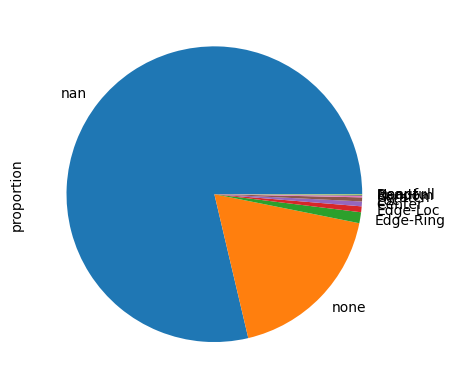

In [26]:
# Mapping the failureType into easier format and handle empty labels
df2.failureType = df2.failureType.apply(lambda x: x[0][0] if len(x) > 0 else pd.NA)

print(f"Data type of the column before: {df2.failureType.dtype}")
df2.failureType = df2.failureType.astype('category')
print(f"Data type after changing: {df2.failureType.dtype}")

print(df2.failureType.value_counts())
df2['failureType'].value_counts(dropna = False, normalize = True).plot.pie()
# df2['failureType'].value_counts().plot.bar()
df2['failureType'].value_counts().sum()

Most of the dataset has empty label, we then have only 172950 data left.

In [28]:
# Remove the unlabeled rows and map defect types into numerical value

df2 = df2.dropna(subset=['failureType'])

type_mapping = {'Center': 0, 
                'Donut': 1, 
                'Edge-Loc': 2, 
                'Edge-Ring': 3, 
                'Loc': 4, 
                'Random': 5, 
                'Scratch': 6, 
                'Near-full': 7, 
                'none': 8}
df2 = df2.replace({'failureType': type_mapping}).infer_objects(copy=False)

df2.head()


,waferMap,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8


defect_distribution.png saved.


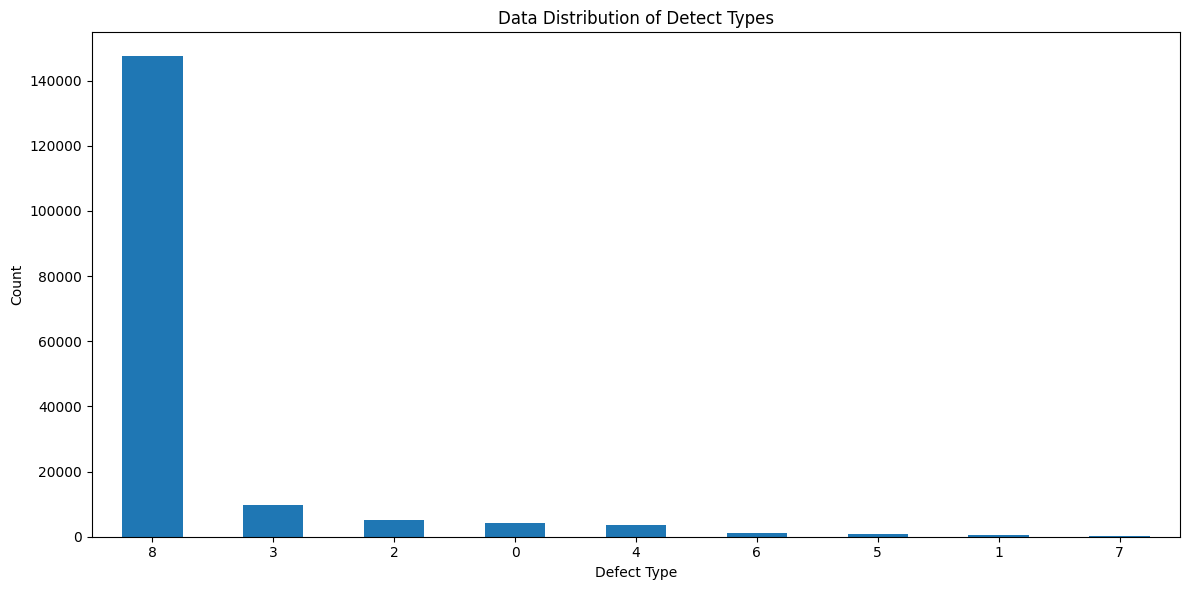

In [39]:
# Data visualization

failure_counts = df2.failureType.value_counts()
plt.figure(figsize=(12, 6))
failure_counts.plot(kind='bar')
plt.title("Data Distribution of Detect Types")
plt.xlabel("Defect Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('defect_distribution.png')
print("defect_distribution.png saved.")